# Evaluation of A/B-test results of a new recommender system for an online store

**Project Objective:**

- To evaluate the correctness of the conducted A/B-test and analyze its results.

**Project Structure:**
- Dataset loading, study of general information. Data preprocessing.
- Assessing the correctness of the test.
- Checking the absence of overlaps with a competing test and users participating in two test groups at the same time.
- Examination of user activity data
- Exploratory data analysis
- Evaluation of A/B testing results
- Conclusions and recommendations

**Technical specificatios:**

Test name: recommender_system_test;

Groups: A (control), B (new payment funnel);

Start date: 2020-12-07;

New user enrollment stop date: 2020-12-21;

Stop date: 2021-01-04;

Expected number of test participants: 15% of new users from the EU region;

Purpose of the test: testing changes related to the implementation of an improved recommendation system;

Expected effect: within 14 days of registration in the system, users will show an improvement in each metric by at least 5 percentage points:
- conversions to product card views - product_page event
- cart views - product_cart event
- purchases - purchase event.

# Dataset upload & pre-processing of the data

In [1]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
from statsmodels.stats.proportion import proportions_ztest
import warnings
warnings.filterwarnings('ignore')

In [89]:
# loading marketing_events dataset

try:
    marketing_events = pd.read_csv('ab_project_marketing_events.csv')
except:
    marketing_events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_project_marketing_events.csv')
marketing_events

name                   regions    start_dt  \
0           Christmas&New Year Promo             EU, N.America  2020-12-25   
1       St. Valentine's Day Giveaway  EU, CIS, APAC, N.America  2020-02-14   
2             St. Patric's Day Promo             EU, N.America  2020-03-17   
3                       Easter Promo  EU, CIS, APAC, N.America  2020-04-12   
4                  4th of July Promo                 N.America  2020-07-04   
5          Black Friday Ads Campaign  EU, CIS, APAC, N.America  2020-11-26   
6             Chinese New Year Promo                      APAC  2020-01-25   
7   Labor day (May 1st) Ads Campaign             EU, CIS, APAC  2020-05-01   
8    International Women's Day Promo             EU, CIS, APAC  2020-03-08   
9    Victory Day CIS (May 9th) Event                       CIS  2020-05-09   
10         CIS New Year Gift Lottery                       CIS  2020-12-30   
11     Dragon Boat Festival Giveaway                      APAC  2020-06-25   
12           Single's Day Gift Promo                      APAC  2020-11-11   
13             Chinese Moon Festival                      APAC  2020-10-01   

     finish_dt  
0   2021-01-03  
1   2020-02-16  
2   2020-03-19  
3   2020-04-19  
4   2020-07-11  
5   2020-12-01  
6   2020-02-07  
7   2020-05-03  
8   2020-03-10  
9   2020-05-11  
10  2021-01-07  
11  2020-07-01  
12  2020-11-12  
13  2020-10-07

In [3]:
# loading 'new_users'

try:
    new_users = pd.read_csv('final_ab_new_users.csv')
except:
    new_users = pd.read_csv('https://code.s3.yandex.net/datasets/final_ab_new_users.csv')
new_users.head()

user_id  first_date     region   device
0  D72A72121175D8BE  2020-12-07         EU       PC
1  F1C668619DFE6E65  2020-12-07  N.America  Android
2  2E1BF1D4C37EA01F  2020-12-07         EU       PC
3  50734A22C0C63768  2020-12-07         EU   iPhone
4  E1BDDCE0DAFA2679  2020-12-07  N.America   iPhone

In [4]:
# loading 'ab_events'

try:
    ab_events = pd.read_csv('final_ab_events.csv')
except:
    ab_events = pd.read_csv('https://code.s3.yandex.net/datasets/final_ab_events.csv')
ab_events.head()

user_id             event_dt event_name  details
0  E1BDDCE0DAFA2679  2020-12-07 20:22:03   purchase    99.99
1  7B6452F081F49504  2020-12-07 09:22:53   purchase     9.99
2  9CD9F34546DF254C  2020-12-07 12:59:29   purchase     4.99
3  96F27A054B191457  2020-12-07 04:02:40   purchase     4.99
4  1FD7660FDF94CA1F  2020-12-07 10:15:09   purchase     4.99

In [90]:
# loading 'ab_participants'

try:
    ab_participants = pd.read_csv('final_ab_participants.csv')
except:
    ab_participants = pd.read_csv('https://code.s3.yandex.net/datasets/final_ab_participants.csv')
ab_participants.head()

user_id group                  ab_test
0  D1ABA3E2887B6A73     A  recommender_system_test
1  A7A3664BD6242119     A  recommender_system_test
2  DABC14FDDFADD29E     A  recommender_system_test
3  04988C5DF189632E     A  recommender_system_test
4  482F14783456D21B     B  recommender_system_test

In [107]:
# function to check for missing values and duplicates and viewing df info

def df_check(df):
    print('number of missing values:', '\n', df.isna().sum(), '\n')
    print('number of duplicates:', df.duplicated().sum(), '\n')
    print(df.info())

In [108]:
# checking for missing values and duplicates

df_check(marketing_events)

number of missing values: 
 name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64 

number of duplicates: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes
None


In [109]:
# checking for missing values and duplicates

df_check(new_users)

number of missing values: 
 user_id       0
first_date    0
region        0
device        0
dtype: int64 

number of duplicates: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     61733 non-null  object        
 1   first_date  61733 non-null  datetime64[ns]
 2   region      61733 non-null  object        
 3   device      61733 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.9+ MB
None


In [110]:
# checking for missing values and duplicates

df_check(ab_events)

number of missing values: 
 user_id            0
event_dt           0
event_name         0
details       377577
dtype: int64 

number of duplicates: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     440317 non-null  object        
 1   event_dt    440317 non-null  datetime64[ns]
 2   event_name  440317 non-null  object        
 3   details     62740 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 13.4+ MB
None


In [111]:
# checking for missing values and duplicates

df_check(ab_participants)

number of missing values: 
 user_id    0
group      0
ab_test    0
dtype: int64 

number of duplicates: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB
None


There are no obvious duplicates in all presented dataframes. There are missing values in the 'details' column of the 'ab_events' dataframe. Since this is additional data about the event, their presence is probably not mandatory, so we'll leave these missing values as is. The column names are presented in snake case and don't need to be changed.

In all columns with dates, the data type needs to be set to 'datetime':

In [7]:
# setting columns with dates to 'datetime'

marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt'])
marketing_events['finish_dt'] = pd.to_datetime(marketing_events['finish_dt'])

new_users['first_date'] = pd.to_datetime(new_users['first_date'])

ab_events['event_dt'] = pd.to_datetime(ab_events['event_dt'])

Some columns need to be checked for uniqueness of values and absence of implicit duplicates.

In [91]:
# checking region and device names for implicit duplicates

new_users['region'].unique(), new_users['device'].unique()

(array(['EU', 'N.America', 'APAC', 'CIS'], dtype=object),
 array(['PC', 'Android', 'iPhone', 'Mac'], dtype=object))

In [9]:
# checking 'event_name' columns for implicit duplicates

ab_events['event_name'].unique()

array(['purchase', 'product_cart', 'product_page', 'login'], dtype=object)

In [10]:
# checking that there are 2 groups and 1 results only for 'recommender_system_test'

ab_participants['group'].unique(), ab_participants['ab_test'].unique()

(array(['A', 'B'], dtype=object),
 array(['recommender_system_test', 'interface_eu_test'], dtype=object))

There are no implicit duplicates in the names of regions, devices, event types. There are also only 2 test groups, as there should be. 

The 'ab_participants' dataframe contains the interface_eu_test, which is outside the scope of the current analysis. It's necessary to investigate if there are users who participated in both tests. To find that out, 2 datasets based on 'ab_participants' will be created: one with users of the recommender system, and one with users of the competing test, to find out if there are overlapping users across tests.

## Processing users that participated in 2 tests

In [49]:
# identifying users for each test
ab_participants_recommender = ab_participants.query('ab_test != "interface_eu_test"')
ab_participants_interface = ab_participants.query('ab_test == "interface_eu_test"')

# checking the number of participants for each
len(ab_participants_recommender), len(ab_participants)

(6701, 18268)

In [51]:
# number of users with 2 tests

test_groups = (
    ab_participants.sort_values(by='ab_test')
    .groupby('user_id')
    .agg({'ab_test':['last','nunique']})
    .reset_index()
)
test_groups.set_axis(['user_id', 'test', 'tests_count'], axis='columns', inplace=True)
test_groups.query('tests_count == 2')['user_id'].count()

1602

In [52]:
# users with 2 tests by test groups

users_two_tests = test_groups.query('tests_count == 2')['user_id'].unique()

(
    ab_participants[ab_participants['user_id'].isin(users_two_tests)]
    .pivot_table(index='group', columns='ab_test', values='user_id', aggfunc='count')
)

ab_test  interface_eu_test  recommender_system_test
group                                              
A                      819                      921
B                      783                      681

We have no information how the interface test could have affected the behavior of the users of the 'recommender' test. Therefore, we decided to filter out those users who fell into group B of the 'interface_eu_test', so that we could exclude the connection of the recommender test results with interface changes.

In [53]:
# identifying 'interface_test' group B

interface_group_b = ab_participants_interface[(ab_participants_interface["group"] == 'B') \
                          & (ab_participants_interface['user_id'].isin(users_two_tests))]['user_id'].unique()


In [54]:
# filtering out 'interface_test' group B

ab_participants_clean = ab_participants_recommender[~ab_participants_recommender['user_id'].isin(interface_group_b)]
len(ab_participants_clean)

5918

# Evaluating the correctness of the test

## Check the period of user enrollment in the test

According to the specification, we have three dates to check in the test:

- Start date: 2020-12-07
- Stop date for new user recruitment: 2020-12-21
- Stop date: 2021-01-04

To check the start and stop dates of a set of new users, we can compare the dates from the specification with the minimum and maximum dates from new_users. To check the test stop date, let's take the maximum date from ab_events. We'll also merge 'new_users' and 'ab_events' dataframes for further work.

In [55]:
# merged dataframe with new users and their events

df = new_users.merge(ab_events, on='user_id', how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443347 entries, 0 to 443346
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     443347 non-null  object        
 1   first_date  443347 non-null  datetime64[ns]
 2   region      443347 non-null  object        
 3   device      443347 non-null  object        
 4   event_dt    440317 non-null  datetime64[ns]
 5   event_name  440317 non-null  object        
 6   details     62740 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 27.1+ MB


The same number of missing values in the columns 'event_dt' and 'event_name'  appeared in the new dataframe. These are probably the users who have not taken any actions during the test.

In [17]:
# checking the dates

display(df['first_date'].min(), df['first_date'].max(), df['event_dt'].max())

Timestamp('2020-12-07 00:00:00')

Timestamp('2020-12-23 00:00:00')

Timestamp('2020-12-30 23:36:33')

There are discrepancies in the dates: the test start date corresponds to the specification, but the enrollment of new users was stopped 2 days later than the specified date. The test completion date also does not correspond to the specification. The last event occurred on 2020-12-30, i.e. 5 days earlier than the scheduled completion date.

Since our test should only include users who were registered during the period when new users were enrolled in the test, those who arrived after 2020-12-21 will be filtered out.

Completing the test earlier than planned could have a negative impact on the test: not all users will have 14 days of activity as planned.

In [56]:
# filtering the users who came later than the enrollment end date

df = df.query('first_date < "2020-12-21 23:59:00"')

## Checking the user registration region

Per specifications, the expected number of test participants is 15% of new users from the EU region.

In [57]:
# merging the dataframe with 'ab_participants_clean'

df_final = df.merge(ab_participants_clean, on='user_id', how='left')
df_final.head()

user_id first_date     region   device            event_dt  \
0  D72A72121175D8BE 2020-12-07         EU       PC 2020-12-07 21:52:10   
1  D72A72121175D8BE 2020-12-07         EU       PC 2020-12-07 21:52:07   
2  F1C668619DFE6E65 2020-12-07  N.America  Android 2020-12-07 16:38:09   
3  F1C668619DFE6E65 2020-12-07  N.America  Android 2020-12-08 02:02:34   
4  F1C668619DFE6E65 2020-12-07  N.America  Android 2020-12-23 14:35:41   

     event_name  details group                  ab_test  
0  product_page      NaN     A  recommender_system_test  
1         login      NaN     A  recommender_system_test  
2  product_page      NaN   NaN                      NaN  
3  product_page      NaN   NaN                      NaN  
4  product_page      NaN   NaN                      NaN

In [58]:
# checking whether all the test users are from the EU

df_final.query('ab_test == "recommender_system_test"')['region'].unique()

array(['EU', 'APAC', 'CIS', 'N.America'], dtype=object)

In [61]:
# checking if the number of the test EU users is 15% of the total number of EU users

eu_users = df_final.query('region == "EU"')['user_id'].nunique()
eu_users_test = df_final.query('region == "EU" & ab_test == "recommender_system_test"')['user_id'].nunique()
print(f'EU test users ratio: {eu_users_test/eu_users:.2%}')

EU test users ratio: 13.15%


Not all users included in the test represent the target region. In addition to EU, users from Asia-Pacific, CIS and North America participated in the test. 

The percentage of test participants from EU is also lower than expected: 13.15% vs 15%.

##  Dynamics of user enrollment and uniformity of distribution across test groups

In [62]:
# Checking the number of users in each group

group_a_size = df_final.query('group == "A"')['user_id'].nunique()
group_b_size = df_final.query('group == "B"')['user_id'].nunique()
group_a_size, group_b_size, group_a_size + group_b_size, group_a_size - group_b_size

(3385, 2533, 5918, 852)

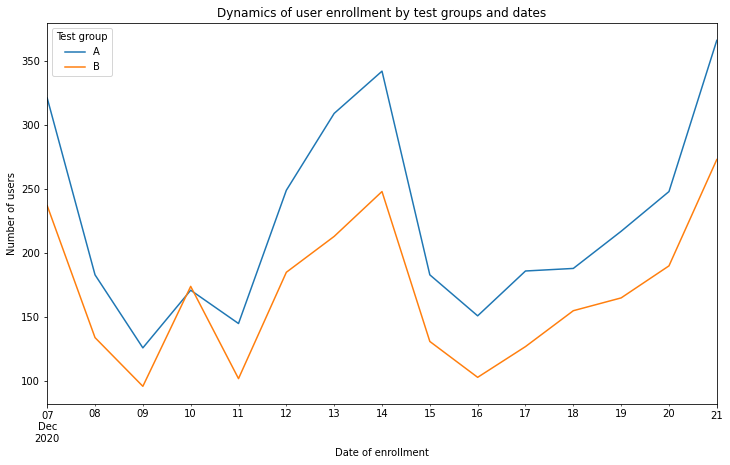

In [63]:
# Dynamics of user enrollment by day

df_grouped = df_final.groupby(['group', 'user_id']).agg({'first_date': 'min'}).reset_index()

user_counts = df_grouped.groupby(['first_date', 'group']).size().unstack()

# Visualization of user distribution by groups and dates

user_counts.plot(figsize=(12, 7))
plt.title('Dynamics of user enrollment by test groups and dates')
plt.xlabel('Date of enrollment')
plt.ylabel('Number of users')
plt.legend(title='Test group')
plt.show()

The users are not evenly distributed: the control group has almost 852 more users than the users from the new funnel.

In terms of user recruitment dynamics, it can be noted that both groups showed similar dynamics, and both stand out with a sharp jump in new users on Dec, 14.

##  Users participaing in both test groups

In [24]:
# checking for users participaing in both test groups

user_groups = df_final.groupby('user_id')['group'].nunique()
user_groups[user_groups > 1]

Series([], Name: group, dtype: int64)

There are no users participaing in both groups.

##  User activity data

###  event dates

In [66]:
print('First event date:', df.event_dt.min(), 'Last event date:', df.event_dt.max())
print('Test launch date: 2020-12-07', 'Test stop date: 2021-01-04')


First event date: 2020-12-07 00:00:33 Last event date: 2020-12-30 23:36:33
Test launch date: 2020-12-07 Test stop date: 2021-01-04


Events in the test stopped 5 days earlier than the date suggested in specifications.

### user activity

In [67]:
# users without events

actions_after_first_date = df_final[df_final['event_dt'] > df_final['first_date']]

users_no_actions = set(df_final['user_id']) - set(actions_after_first_date['user_id'])
len(users_no_actions)

3030

There are users who have not performed any actions after registration. Although we don't have this information in the specifications, it seems logical that when testing the recommender system, the user sees recommendations after logging in. If the user only registered and did not log in again, then the change being tested probably could not affect him. Therefore, such users need to be filtered out, and the 'login' action will be considered as the first step of the funnel.

In [68]:
# filtering the users with no actions

df_final = df_final[~df_final['user_id'].isin(users_no_actions)]
df_final

user_id first_date     region   device            event_dt  \
0       D72A72121175D8BE 2020-12-07         EU       PC 2020-12-07 21:52:10   
1       D72A72121175D8BE 2020-12-07         EU       PC 2020-12-07 21:52:07   
2       F1C668619DFE6E65 2020-12-07  N.America  Android 2020-12-07 16:38:09   
3       F1C668619DFE6E65 2020-12-07  N.America  Android 2020-12-08 02:02:34   
4       F1C668619DFE6E65 2020-12-07  N.America  Android 2020-12-23 14:35:41   
...                  ...        ...        ...      ...                 ...   
410775  1C7D23927835213F 2020-12-20         EU   iPhone 2020-12-23 15:47:23   
410776  1C7D23927835213F 2020-12-20         EU   iPhone 2020-12-25 12:31:04   
410777  1C7D23927835213F 2020-12-20         EU   iPhone 2020-12-27 03:51:35   
410778  8F04273BB2860229 2020-12-20         EU  Android 2020-12-20 03:17:17   
410779  8F04273BB2860229 2020-12-20         EU  Android 2020-12-20 03:17:17   

          event_name  details group                  ab_test  
0       product_page      NaN     A  recommender_system_test  
1              login      NaN     A  recommender_system_test  
2       product_page      NaN   NaN                      NaN  
3       product_page      NaN   NaN                      NaN  
4       product_page      NaN   NaN                      NaN  
...              ...      ...   ...                      ...  
410775         login      NaN   NaN                      NaN  
410776         login      NaN   NaN                      NaN  
410777         login      NaN   NaN                      NaN  
410778  product_cart      NaN   NaN                      NaN  
410779         login      NaN   NaN                      NaN  

[407750 rows x 9 columns]

In [69]:
# checking the numbers of remaining users 

df_final.groupby('group')['user_id'].nunique()

group
A    2422
B     822
Name: user_id, dtype: int64

As a result of filtration, the groups became very uneven: the size of group A is almost 3 times larger than the size of group B.

###  event lifetime

In [30]:
# calculating event lifetimes
df_final['lifetime'] = (df_final['event_dt'] - df_final['first_date']).dt.days

# filtering events that occurred more than 14 days after registration
df_final = df_final[df_final['lifetime'] <= 14]

In [31]:
# checking if all participants could have events within 14 days of registration.
eligible_date = df_final['event_dt'].max() - pd.Timedelta(days=14)

# checking how many users have a registration date before 'eligible_date'
eligible_users = df_final[df_final['first_date'] <= eligible_date]['user_id'].unique()

In [70]:
# number of users in the remaining dataframe

df_final[df_final['user_id'].isin(eligible_users)].groupby('group')['user_id'].nunique()

group
A    1066
B     475
Name: user_id, dtype: int64

### Timing of first events by type

In [72]:
# counting the number of days from 'first_date' to 'event_dt'
df_final['days_to_first_event'] = (df_final['event_dt'] - df_final['first_date']).dt.days

# visualization
fig = px.histogram(df_final, x='days_to_first_event', color='event_name',
                   barmode='group',
                   title='Number of first events by day from signup')
fig.show()

We see that most of the first events occur within the first few days after registration. The more time passes from the day of registration, the less active users are.

## Conclusion

The analysis revealed a number of discrepancies with the specifications:
- Test dates: The test was completed 5 days earlier than the specified date.
- Expected number of test participants: 6000. After filtering and data cleaning, 3244 users remained in the study - almost half of the planned number.
- Expected number of test participants: 15% of new users from the EU region. Also inconsistent with the specifications: after filtering out users from a competing test, the percentage of test participants from the EU was 13.15%, not 15%.
- There are no overlaps between test groups, so this point is OK.
- The groups could have been formed incorrectly, as group B became almost 3 times less than those of group A after filtering the data.

**Thus, the test is not compliant with the specifications provided.**

- Based on the baseline conversion rate of 50% and the expected effect of changing the metrics by 5 percentage points, let's use the [calculator](https://www.evanmiller.org/ab-testing/sample-size.html) to estimate the recommended sample size. The desired power of the test (1 - β): 80%. With these parameters, the recommended sample size is 1567 participants. The sample size after filtering is 3244 people, which means that even with this number of participants it is possible to determine a statistically significant difference in conversion.


# Exploratory data analysis

## Distribution of the number of events per group

In [74]:
event_counts = df_final.groupby(['user_id', 'group'])['event_name'].count().reset_index()

# visualizing the distribution of the number of events per user
fig = px.histogram(event_counts, x='event_name', color='group', barmode='overlay',
                   labels={'event_name': 'events count'}, title='Distribution of the number of events per group')
fig.update_layout(xaxis_title='Number of events', yaxis_title='number of users')
fig.show()


In [75]:
# average number of events by group

event_counts.groupby('group')['event_name'].mean()

group
A    7.080512
B    5.709246
Name: event_name, dtype: float64

The distribution of the number of events by users has a similar structure for both groups. Group A has the most users with 6 events, while B has 4 events. Average number of events by groups: almost 7 in group A and 5.5 in group B.

## Dynamics of the number of events in test groups by day

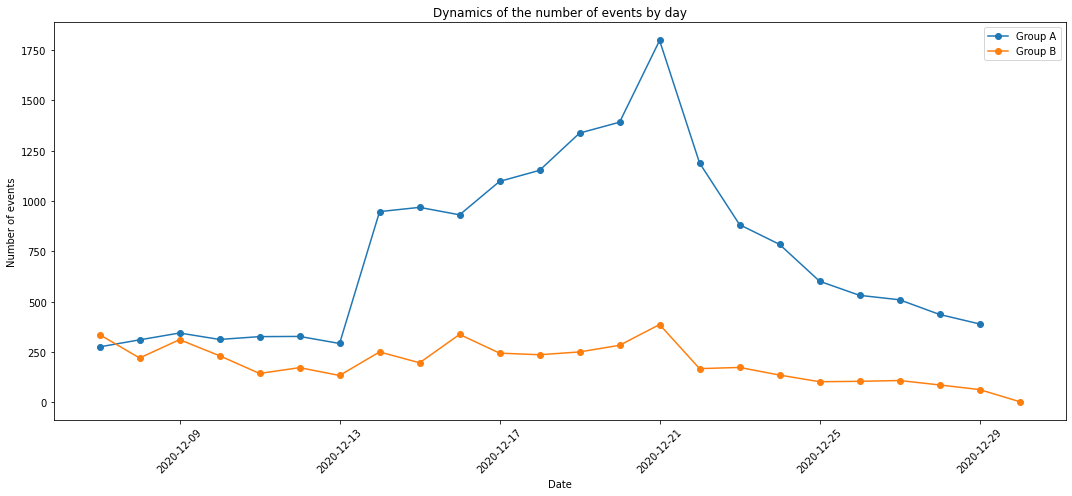

In [77]:
# grouping data by date and group, counting the number of events
event_counts_by_day = df_final.groupby([df_final['event_dt'].dt.date, 'group']).size().reset_index(name='event_count')

# plotting the graph for each group
fig, ax = plt.subplots(figsize=(15, 7))
for group in event_counts_by_day['group'].unique():
    group_data = event_counts_by_day[event_counts_by_day['group'] == group]
    ax.plot(group_data['event_dt'], group_data['event_count'], marker='o', label=f'Group {group}')

ax.set_xlabel('Date')
ax.set_ylabel('Number of events')
ax.set_title('Dynamics of the number of events by day')
ax.legend()
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


During the test, group A showed higher results in terms of the number of events per day than group B (except for day 1). In general, both groups show similar dynamics in activity distribution. Since December 14, group A has been significantly ahead of group B in terms of the number of events. On December 21, both groups had a peak of activity.

## Overlaps with marketing events

In [79]:
# actual test start and end dates

ab_test_start = pd.to_datetime('2020-12-07')
ab_test_end = pd.to_datetime('2021-12-30')

In [80]:
# function to check the overlap of test dates with marketing events

def check_overlap(test_start, test_end, events):
    overlaps = []
    for index, row in events.iterrows():
        if (row['start_dt'] <= test_end) and (row['finish_dt'] >= test_start):
            overlaps.append(row['name'])
    return overlaps

In [81]:
# checking for overlaps
overlapping_events = check_overlap(ab_test_start, ab_test_end, marketing_events)

print("Events overlapping with the A/B test:", overlapping_events)

Events overlapping with the A/B test: ['Christmas&New Year Promo', 'CIS New Year Gift Lottery']


There are two overlapping events:

- **CIS New Year Gift Lottery** is not a cause for concern, as it is an event for the CIS, and we are interested in users from Europe, who should not have been affected.

- **Christmas&New Year Promo** could definitely affect the behavior of European users, as Christmas is one of the biggest holidays and a time of active purchases. At the same time, it should be noted that on the chart with the dynamics of events by days we do not see a surge around 25.12.

## Funnel for product events

In the previous steps, it was decided to filter out users who did not perform actions after registration, and to consider the 'login' event as the first step of the funnel. 

Having information about events in the 'event_name column', we'll use the following product funnel: login -> product_page -> product_cart -> purchase.

In [40]:
# users for group A funnel

users_funnel_a = df_final.query('group == "A"')
users_funnel_a = users_funnel_a.groupby('event_name')['user_id'].nunique().reset_index()
users_funnel_a = users_funnel_a.reindex([0, 2, 1, 3])
users_funnel_a

event_name  user_id
0         login     2422
2  product_page     1571
1  product_cart      728
3      purchase      773

In [82]:
# users for group B funnel

users_funnel_b = df_final.query('group == "B"')
users_funnel_b = users_funnel_b.groupby('event_name')['user_id'].nunique().reset_index()
users_funnel_b = users_funnel_b.reindex([0, 2, 1, 3])
users_funnel_b

event_name  user_id
0         login      822
2  product_page      459
1  product_cart      225
3      purchase      226

In [83]:
# funnels for both groups

fig = go.Figure()
fig.add_trace(go.Funnel(
    name='Group A',
    y = users_funnel_a['event_name'].to_list(),
    x = users_funnel_a['user_id'].to_list() ,
    textposition = "inside",
    textinfo = "value+percent previous+ percent initial"
    ))
fig.add_trace(go.Funnel(
    name='Group B',
    y = users_funnel_b['event_name'],
    x = users_funnel_b['user_id'].to_list(),
    textposition = "auto",
    textinfo = "value+percent previous+ percent initial"
    )) 
fig.update_layout(title_text='Funnel for А/В groups')

fig.show()

On the funnel for group A, there are more purchases than cart views - apparently, this means that the cart is not a mandatory stage of the funnel. We do not observe the expected effect of increasing the conversion rate in group B relative to the conversion rate in group A. The conversion of group B is lower than that of group A at the stage of transition from registration to the product page, and the conversion to purchase is also lower.

# Evaluation of A/B test results

Next, we'll test the statistical difference between conversions using z-criterion. For this purpose, let's form three pairs of hypotheses based on the number of conversions in the product funnel:

**hypothesis 1:**
- **Н0**: Conversion from 'login' to 'product_page' by group A is equal to that of group B
- **Н1**: Conversion from 'login' to 'product_page' among group A is not equal to conversion among group B

**Hypothesis 2:**
- **Н0**: Conversion from 'product_page' to 'product_cart' in group A is equal to conversion in group B 
- **Н1**: Conversion from 'product_page' to 'product_cart' in group A is not equal to conversion in group B

**Hypothesis 3:**
- **Н0**: Conversion from 'product_cart' to 'purchase' in group A is equal to conversion in group B
- **Н1**: Conversion from 'product_cart' to 'purchase' in group A is not equal to conversion in group B

The significance level α in all cases is assumed to be 0.05.

In [84]:
# distribution of unique users by events

users_by_events1 = \
df_final.pivot_table(index='group', columns='event_name', values='user_id', aggfunc='nunique').reset_index()
users_by_events1 = users_by_events1.reset_index(drop=True)
users_by_events1

event_name group  login  product_cart  product_page  purchase
0              A   2422           728          1571       773
1              B    822           225           459       226

In [44]:
# unique users, group A
unique_users_a = df_final[df_final['group'] == "A"]['user_id'].nunique()
unique_users_a

2422

In [85]:
# unique users, group В
unique_users_b = df_final[df_final['group'] == "B"]['user_id'].nunique()
unique_users_b

822

In [86]:
# z-test for hypothesis 1
product_page = [users_by_events1.loc[0, 'product_page'], users_by_events1.loc[1, 'product_page']]
user_groups = [unique_users_a, unique_users_b]

z, p = proportions_ztest(product_page, user_groups)

print(f"Z-statistic: {z}")
print(f"P-value: {p}")

if p < 0.05:
    print("Reject the null hypothesis: the conversions of the two groups are different")
else:
    print("We cannot reject the null hypothesis: there is no reason to consider the conversions different")

Z-statistic: 4.6197784297625395
P-value: 3.841500556603692e-06
Reject the null hypothesis: the conversions of the two groups are different


In [87]:
# z-test for hypothesis 2
product_cart = [users_by_events1.loc[0, 'product_cart'], users_by_events1.loc[1, 'product_cart']]

z, p = proportions_ztest(product_cart, user_groups)

print(f"Z-statistic: {z}")
print(f"P-value: {p}")

if p < 0.05:
    print("Reject the null hypothesis: the conversions of the two groups are different")
else:
    print("We cannot reject the null hypothesis: there is no reason to consider the conversions different")

Z-statistic: 1.4606163027474541
P-value: 0.14412076974264504
We cannot reject the null hypothesis: there is no reason to consider the conversions different


In [88]:
# z-test for hypothesis 3
purchase = [users_by_events1.loc[0, 'purchase'], users_by_events1.loc[1, 'purchase']]

z, p = proportions_ztest(purchase, user_groups)

print(f"Z-statistic: {z}")
print(f"P-value: {p}")

if p < 0.05:
    print("Reject the null hypothesis: the conversions of the two groups are different")
else:
    print("We cannot reject the null hypothesis: there is no reason to consider the conversions different")

Z-statistic: 2.3728864870433464
P-value: 0.017649687175216127
Reject the null hypothesis: the conversions of the two groups are different


## Conclusion of the exploratory analysis and evaluation of the A/B test results

The exploratory analysis has revealed the following:

The distribution of the number of events per user has a similar pattern for both groups. Group A averaged more events per user than group B (7 vs 5.5)

Also, group A performed better in terms of number of events per day than group B (except day 1) during the testing period. 

There was an overlap with the Christmas&New Year Promo marketing event, which may have influenced the behavior of European users. At the same time, it should be noted that on the graph with the dynamics of events by day we do not see a spike around 25.12.

On the product funnel we see that group B loses by conversions at all stages except for the product_page -> product_cart transition. Conversion to purchase in the control group is 4 p.p. higher than in the test group.

The following conclusions are made based on the results of checking the statistical difference using z-test:

- Conversions of the two groups are different for the product_page stage of the funnel 
- We can't talk about the difference in conversions for the product_cart funnel stage
- Conversions of two groups differ for the purchase funnel stage

# Conclusion and recommendations

Based on the conducted research, it can be stated that the test was conducted incorrectly. The planned effect of improving each conversion by at least 5 percentage points was not achieved. As a result, there is no reason to claim conversion improvements related to the implementation of the new recommender system.

**Recommendations**:
- Currently disable the recommender system.
- Take into account the mistakes made in the current test and launch a new one if necessary.